<a href="https://colab.research.google.com/github/Vaishnaviidama/Machine-Learning/blob/main/bank_churn_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
# Load your dataset
dat = pd.read_csv("/content/Churn_Modelling.csv")

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
dat.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
print(f"There are {dat.shape[0]} rows and {dat.shape[1]} columns.")

There are 10000 rows and 14 columns.


In [42]:
data = dat.drop(["CustomerId"], axis=1)
data.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
num_col = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

In [44]:
cat_col = [
    "Country",
    "Gender",
    "Tenure",
    "Numberofproducts",
    "Hascrcard",
    "Isactivemember",
    "Exited",
]


In [45]:
for i in num_col :
    print(dat[i].value_counts())
    print("*" * 50)

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64
**************************************************
Age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
**************************************************
Balance
0.00         3617
130170.82       2
105473.74       2
159397.75       1
144238.70       1
             ... 
108698.96       1
238387.56       1
111833.47       1
126619.27       1
138734.94       1
Name: count, Length: 6382, dtype: int64
**************************************************
EstimatedSalary
24924.92     2
121505.61    1
89874.82     1
72500.68     1
182692.80    1
            ..
188377.21    1
55902.93     1
4523.74      1
102195.16    1
2465.80      1
Name: count, Length: 9999, dtype: int64
**************************************************


In [46]:
# Split the Data
X_data = data.drop(["Exited", "Surname"], axis=1)
y_data = data["Exited"]  # target variable

In [47]:
# Creating Dummy variables for the 2 object variables
X_data = pd.get_dummies(X_data, columns=["Geography", "Gender"])
X_data.sample(10)

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3405,3406,694,60,9,0.00,1,1,1,57088.97,True,False,False,False,True
6765,6766,461,40,7,0.00,2,1,0,176547.80,True,False,False,True,False
8881,8882,744,29,1,43504.42,1,1,1,119327.75,True,False,False,False,True
1383,1384,571,23,10,151097.28,1,0,1,17163.75,True,False,False,True,False
6518,6519,521,49,4,82940.25,2,0,0,62413.01,False,False,True,True,False
1828,1829,547,31,9,0.00,2,0,0,99294.22,False,False,True,True,False
7700,7701,752,31,4,144637.86,2,1,0,40496.72,False,False,True,True,False
4087,4088,637,60,3,0.00,2,1,1,70174.03,True,False,False,False,True
8407,8408,726,28,2,0.00,1,0,0,98060.51,True,False,False,False,True
4017,4018,811,46,9,180226.24,1,1,0,13464.64,True,False,False,False,True


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=7
)

In [49]:
# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [50]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [51]:
# initialize the model
model = Sequential()

In [52]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=8, input_dim=14, activation="relu"))  # input of 14 columns
# hidden layer
model.add(Dense(units=16, activation="relu"))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(X_train, y_train, batch_size=15, epochs=10, validation_split=0.2)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7916 - loss: 0.5022 - val_accuracy: 0.7894 - val_loss: 0.4756
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8014 - loss: 0.4405 - val_accuracy: 0.7950 - val_loss: 0.4573
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8022 - loss: 0.4242 - val_accuracy: 0.8000 - val_loss: 0.4442
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4079 - val_accuracy: 0.8156 - val_loss: 0.4273
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8422 - loss: 0.3760 - val_accuracy: 0.8256 - val_loss: 0.4099
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3835 - val_accuracy: 0.8450 - val_loss: 0.3936
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8505 - loss: 0.3708 - val_accuracy: 0.8506 - val_loss: 0.3821
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.3581 - val_accuracy: 0.

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set_theme()


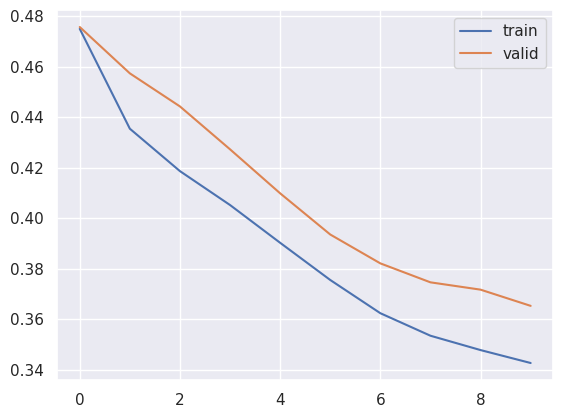

In [57]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

In [58]:
score = model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3456
